### Анализ поведения пользователей в мобильном приложении

Ссылка на презентацию: https://drive.google.com/file/d/1ngsJNZMIZGDzcgSog4Zl2d3AT42lY5_i/view?usp=sharing

### [Ссылка на дашборд](https://public.tableau.com/views/MobileApp_16713598418930/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link/)

### Задача:

1. Проанализировать связь целевого события — просмотра контактов — и других действий пользователей. 
2. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.
3. Исследовать в динамике переходы между распространенными событиями.

### План действий:

1. Предобработка данных (выявление пропусков, явных и неявных дубликатов, приведение данных к необходимым для дальнейшей работы типам)
* Выделить сессии каждого пользователя относительно тайм-аута (если между событиями время больше определенного порога в 30 минут, то их отсносят к разным сессиям)

2. Исследовательский анализ данных: анализ влияния событий на совершение целевого события
   * оценка распределения количества пользователей по видам действий
   * оценка доли пользователей по видам действий относительно общего числа действий 
   * оценка временного периода представленных данных, гистограмма по дате и времени, уточнение временного периода для дальнейшего анализа
   * анализ данных по видам действий в зависимости от источника, с которого пользователь установил приложение - проверка, прослеживаются ли зависимости
   * оценка порядка, в котором происходят события - проверка, все ли они выстраиваются в последовательную цепочку - какие из событий нужно учитывать при расчёте воронки.
   * построение воронки конверсии в целевое действие по видам событий
   * выявление наиболее и наименее популярных действий с точки зрения влияния на целевое событие - на каком шаге теряется наибольшее количсетво пользователей
   
3. Проверка статистических гипотез:

   * Выберем статистический критерий: проверим, является ли нормальным распределение количественных переменных (выборки данных являются независимыми)

   * Одни пользователи совершают действия 'tips_show' и 'tips_click', другие — только 'tips_show'. 
   
   Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп.
   
   * Конверсия в просмотры контактов выше у пользователей, просматривающие фото объявления (совершающих действие photos_show).
   
   Проверим гипотезу:  На конверсию в просмотры контактов влияет действие photos_show
   
4. Выводы 

### Описание данных

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в *mobile_sources.csv*: 

* _userId_ — идентификатор пользователя,
* _source_ — источник, с которого пользователь установил приложение.

Колонки в mobile_dataset.csv: **

* _event.time_ — время совершения,
* _user.id_ — идентификатор пользователя,
* _event.name_ — действие пользователя.

Виды действий:

* _advert_open_ — открыл карточки объявления,
* _photos_show_ — просмотрел фотографий в объявлении,
* _tips_show_ — увидел рекомендованные объявления,
* _tips_click_ — кликнул по рекомендованному объявлению,
* _contacts_show_ и _show_contacts_ — посмотрел номер телефона,
* _contacts_call_ — позвонил по номеру из объявления,
* _map_ — открыл карту объявлений,
* _search_1_—_search_7_ — разные действия, связанные с поиском по сайту,
* _favorites_add_ — добавил объявление в избранное.

### 1. Предобработка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import os
import numpy as np
import datetime
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
import scipy.stats as st
import random
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# импорт файла
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
# функция для исследовательского анализа данных и перевода названий столбцов к нижнему регистру
def info_data(a):
    display(a.head()),
    a.info(),
    print('Дубликатов',a.duplicated().sum()),
    display(a.describe())

In [4]:
info_data(mobile_sourсes)

userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
Дубликатов 0


userId  source
count                                   4293    4293
unique                                  4293       3
top     020292ab-89bc-4156-9acf-68bc2783f894  yandex
freq                                       1    1934

In [5]:
info_data(mobile_dataset)

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
Дубликатов 0


event.time event.name  \
count                        74197      74197   
unique                       74197         16   
top     2019-10-07 00:00:00.431357  tips_show   
freq                             1      40055   

                                     user.id  
count                                  74197  
unique                                  4293  
top     cb36854f-570a-41f4-baa8-36680b396370  
freq                                     478

In [6]:
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [7]:
mobile_dataset['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

#### Выводы: 
* Пропусков данных и дубликатов нет в обеих датасетах 
* В таблице mobile_sourсes 4293 строк записей, тип данных: object
* В таблице mobile_dataset 74197 строк записей, тип данных: object
* Для столбца event.time потребуется преобразование типа данных в тип данных datetime
* Переименовать названия столбцов

In [8]:
# изменение названий столбцов
mobile_sourсes = mobile_sourсes.rename(columns={"userId": "user_id"})
mobile_dataset = mobile_dataset.rename(columns={"event.time": "event_time", "event.name": "event_name", "user.id": "user_id"})

In [9]:
# преобразуем столбец event_time к типу datetime
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

# выделим отдельный столбец с датой
mobile_dataset['date'] = mobile_dataset['event_time'].astype('datetime64[D]')
mobile_dataset.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id       date  
0  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  
1  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07  
3  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07

In [10]:
# объединим датасеты по идентификатору пользователя
data = mobile_dataset.merge(mobile_sourсes, on=['user_id'], how='left')
display(data.head())

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id       date  source  
0  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07   other  
1  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07   other  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07  yandex  
3  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07   other  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07  yandex

In [11]:
set(mobile_dataset.user_id).symmetric_difference(mobile_sourсes.user_id)

set()

In [12]:
# объединим столбцы show_contacts и contacts_show
data.loc[(data.query('event_name == "show_contacts"').index),'event_name'] = "contacts_show"
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

In [13]:
data.loc[(data.query('(event_name == "search_1")|(event_name == "search_2")|(event_name == "search_3")|(event_name == "search_4")|(event_name == "search_5")|(event_name == "search_6")|(event_name == "search_7")').index),'event_name'] = "search"

In [14]:
# оценим долю пропуском данных
missing_data = data.isna().mean()*100
missing_data

event_time    0.0
event_name    0.0
user_id       0.0
date          0.0
source        0.0
dtype: float64

In [15]:
### КОД РЕВЬЮЕРА
data.isna().mean().to_frame(name="Пропуски").style.format("{:.2%}")

Пропущенные значения не обнаружены

#### Выводы:

* Была проведена предобработка и подготовка данных к дальнейшему исследованию
* Исправлены данные столбцов и приведены к подходящему стилю
* Пропуски и дубликаты не обнаружены
* Заменен тип данных столбца с датой и временем
* Добавлен новый столбец с указанием даты
* Объединены столбцы show_contacts и contacts_show

### Исследовательский анализ данных: анализ влияния событий на совершение целевого события

#### Оценим количество переходов и количество пользователей на каждое событие

In [16]:
event_by_time = data.pivot_table(index = 'event_name', values='event_time', aggfunc='nunique').sort_values(by='event_time', ascending=False).reset_index()
event_by_id = data.pivot_table(index = 'event_name', values='user_id', aggfunc='nunique').sort_values(by='user_id', ascending=False).reset_index()

In [17]:
event_by_time

event_name  event_time
0      tips_show       40055
1    photos_show       10012
2         search        6784
3    advert_open        6164
4  contacts_show        4529
5            map        3881
6  favorites_add        1417
7     tips_click         814
8  contacts_call         541

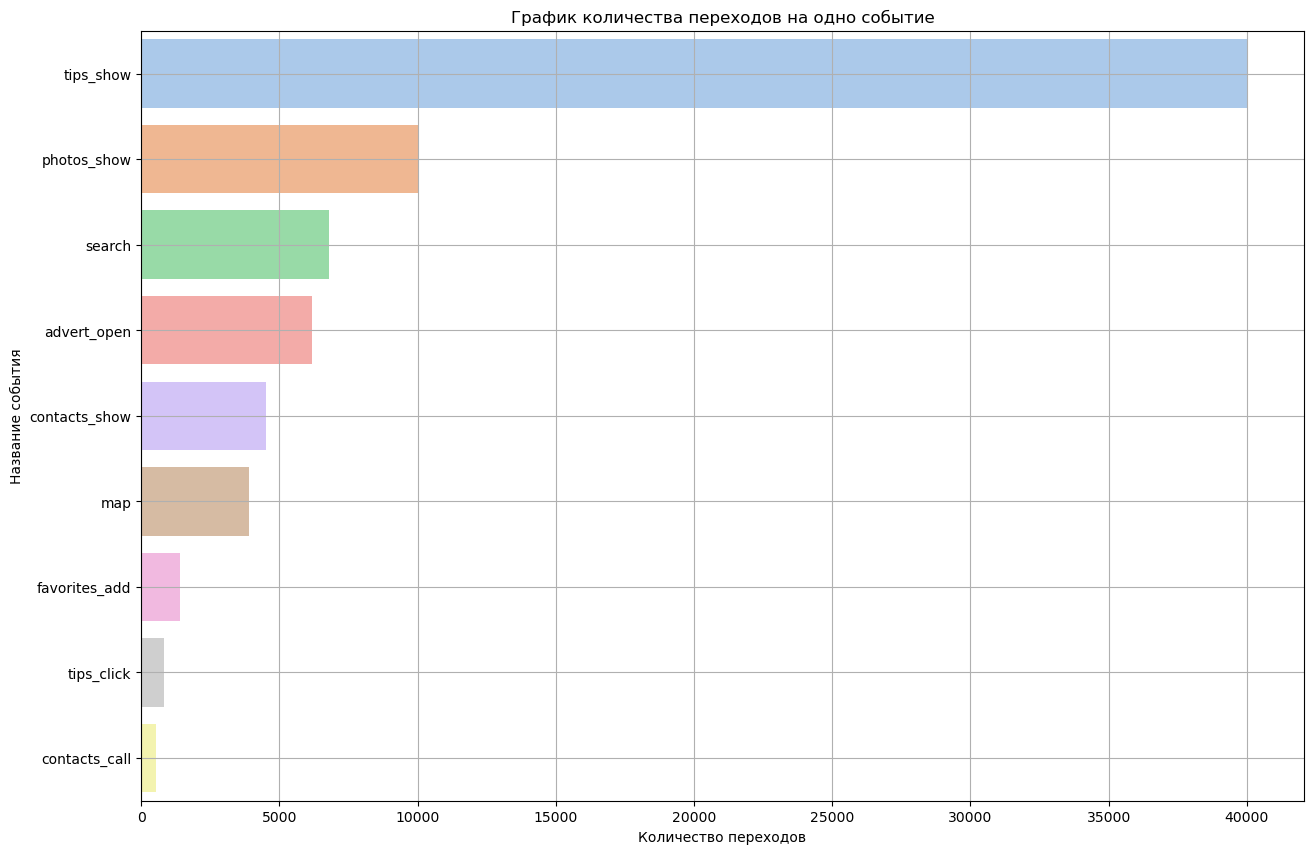

In [18]:
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'event_name', x='event_time', data=event_by_time, palette = 'pastel')
plt.grid()
a.set_xlabel('Количество переходов')
a.set_ylabel('Название события')
a.set_title('График количества переходов на одно событие')
plt.show()

* Наибольшее количество переходов на событие tips_show (увидел рекомендованные объявления) 40055
* Далее по популярности событие photos_show (просмотрел фотографий в объявлении) 10012
* Далее advert_open (открыл карточки объявления) 6164
* Затем contacts show (посмотрел номер телефона) 4450
* Далее map (открыл карту объявлений) 3881
* Для дальнейшего анализа требуется уточнение периода времени перехода на события

In [19]:
grouped_by_user = data.groupby('user_id')['event_name'].count()

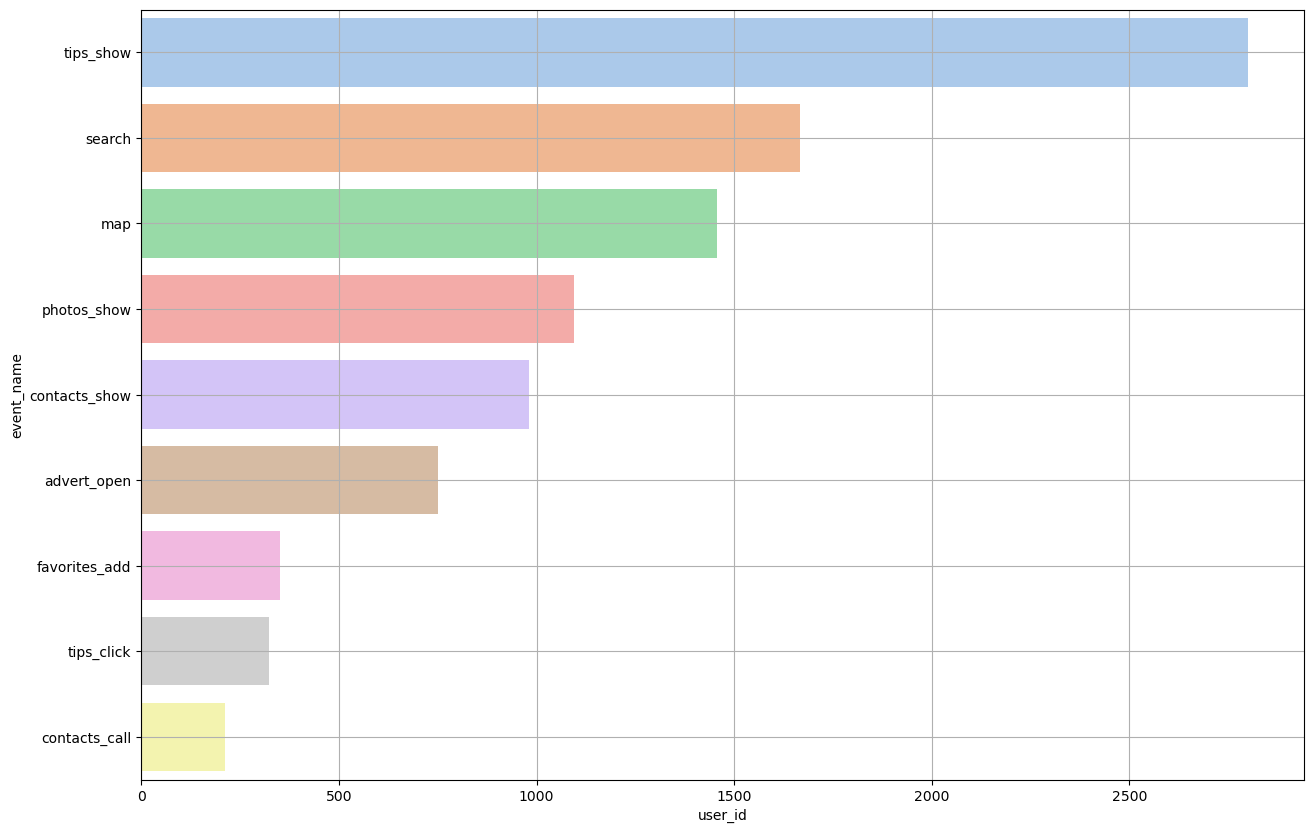

In [20]:
plt.figure(figsize=(15,10))
b = sns.barplot(y = 'event_name', x='user_id', data=event_by_id, palette = 'pastel')
plt.grid()
a.set_xlabel('Количество пользователей')
a.set_ylabel('Название события')
a.set_title('График количества пользователей на одно событие')
plt.show()

In [21]:
event_by_id

event_name  user_id
0      tips_show     2801
1         search     1666
2            map     1456
3    photos_show     1095
4  contacts_show      981
5    advert_open      751
6  favorites_add      351
7     tips_click      322
8  contacts_call      213

Картина меняется при анализе количества пользователей на одно событие:
* Наибольшее количество переходов на событие tips_show (увидел рекомендованные объявления) 2801
* Далее по популярности событие map (открыл карту объявлений) 1456
* Далее photos_show (просмотрел фотографий в объявлении) 1095
* Затем contacts show (посмотрел номер телефона) 979
* Далее search_1 (поиск по сайту) 787

#### Оценка временного периода представленных данных

In [22]:
print('Минимальная дата', data['event_time'].min())
print('Максимальная дата', data['event_time'].max())

Минимальная дата 2019-10-07 00:00:00.431357
Максимальная дата 2019-11-03 23:58:12.532487


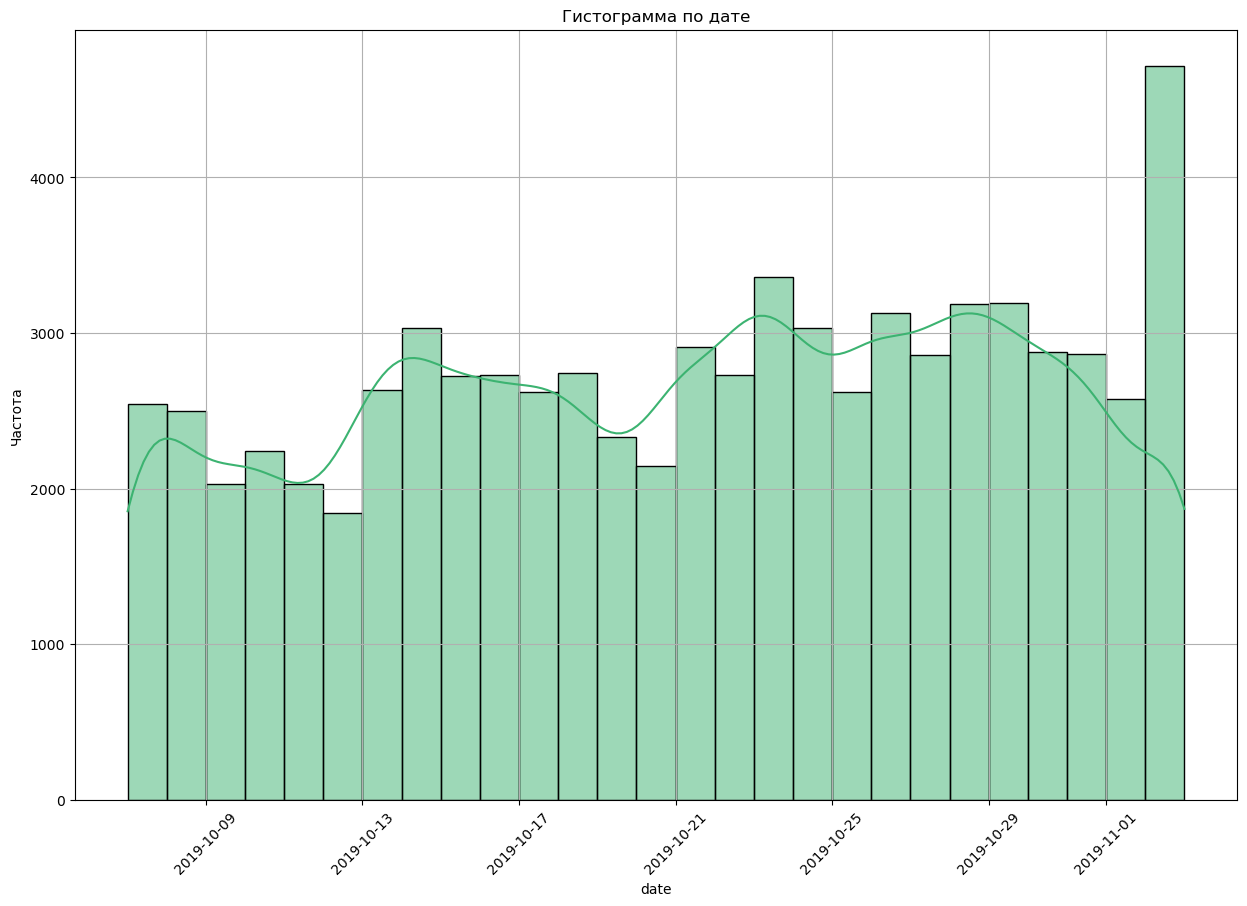

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(data=data['date'], binwidth = 1, kde=True, color = '#3CB371')
plt.grid()
plt.title('Гистограмма по дате')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

Данные за указанный период времени 07.10.2019 - 03.11.2019 являются полными - нет необходимости сокращать временной период

In [24]:
starting = data.groupby('user_id').agg({'event_time':'min'})
ending = data.groupby('user_id').agg({'event_time':'max'})
user_by_time = starting.merge(ending, on='user_id', how='outer').reset_index()
user_by_time.columns = ['user_id', 'session_start', 'ending']
user_by_time['time_delta'] = user_by_time['ending'] - user_by_time['session_start']

In [25]:
data = data.merge(user_by_time, on='user_id', how='outer')
data.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:07.039334    tips_show   
3 2019-10-07 00:01:27.770232  advert_open   
4 2019-10-07 00:01:34.804591    tips_show   

                                user_id       date source  \
0  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  other   
1  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  other   
2  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  other   
3  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  other   
4  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07  other   

               session_start                     ending             time_delta  
0 2019-10-07 00:00:00.431357 2019-10-07 00:18:42.917148 0 days 00:18:42.485791  
1 2019-10-07 00:00:00.431357 2019-10-07 00:18:42.917148 0 days 00:18:42.485791  
2 2019-10-07 00:00:00.431357 2019-10-07 00:18:42.917148 0 days 00:18:42.485791  
3 2019-10-07 00:00:00.431357 2019-10-07 00:18:42.917148 0 days 00:18:42.485791  
4 2019-10-07 00:00:00.431357 2019-10-07 00:18:42.917148 0 days 00:18:42.485791

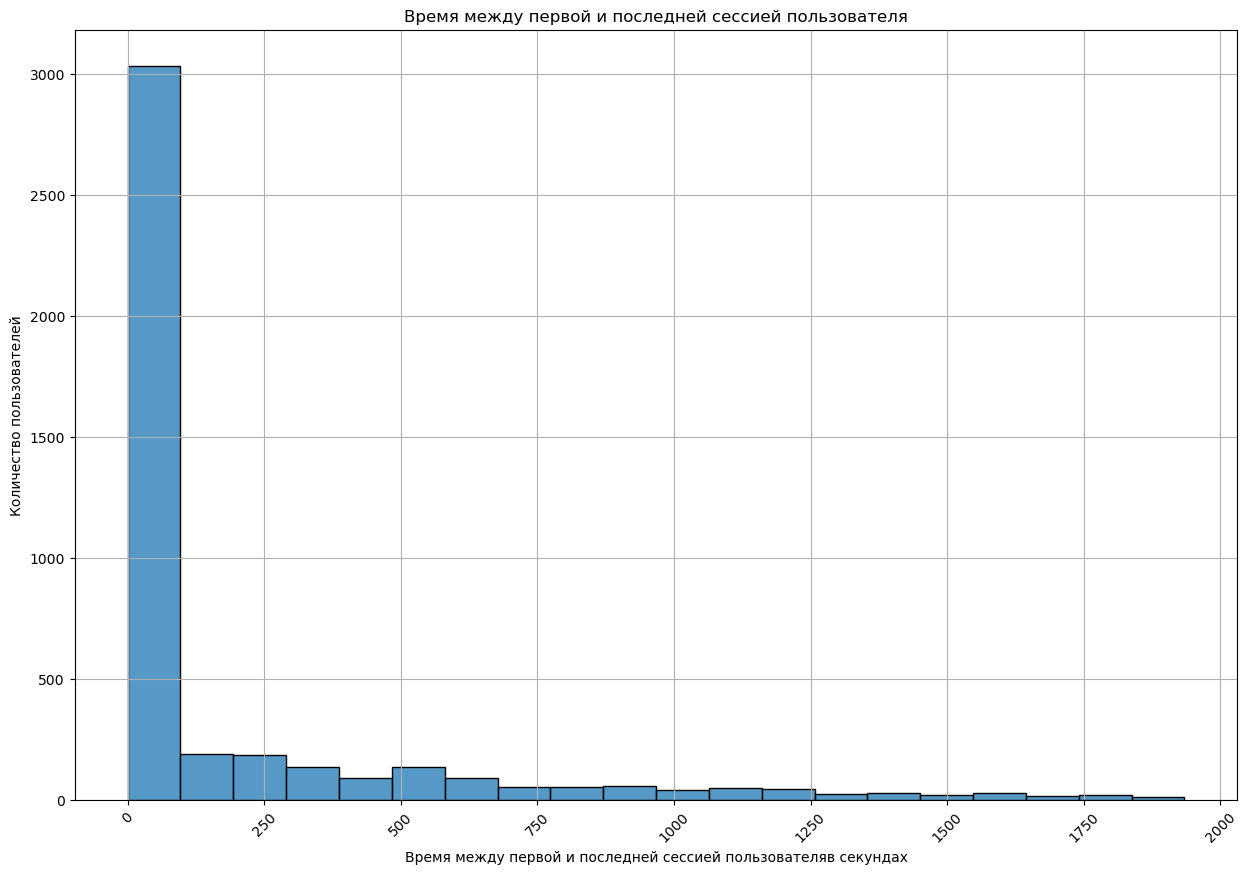

In [26]:
plt.figure(figsize=(15,10))
d = sns.histplot (data = user_by_time['time_delta']/pd.Timedelta(minutes=20),palette="Set3", bins=20)
plt.grid()
d.set_title('Время между первой и последней сессией пользователя')
d.set_xlabel('Время между первой и последней сессией пользователяв секундах')
d.set_ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

* Секунды, проведённые пользователями в приложении, имеют экспоненциальное распределение с пиком в районе нуля, что является нормой — в любом цифровом сервисе многие сессии заканчиваются техническими ошибками.

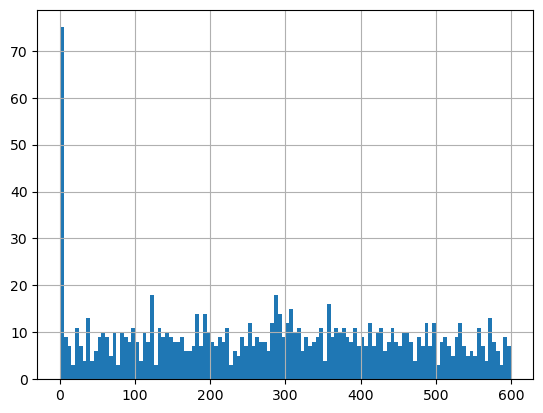

In [27]:
(user_by_time['time_delta']/pd.Timedelta(seconds=1)).hist(bins=range(0,605,5));

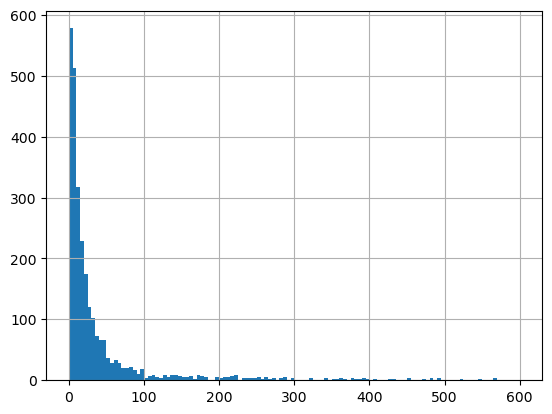

In [28]:
(user_by_time['time_delta']/pd.Timedelta(seconds=60)).hist(bins=range(0,605,5));

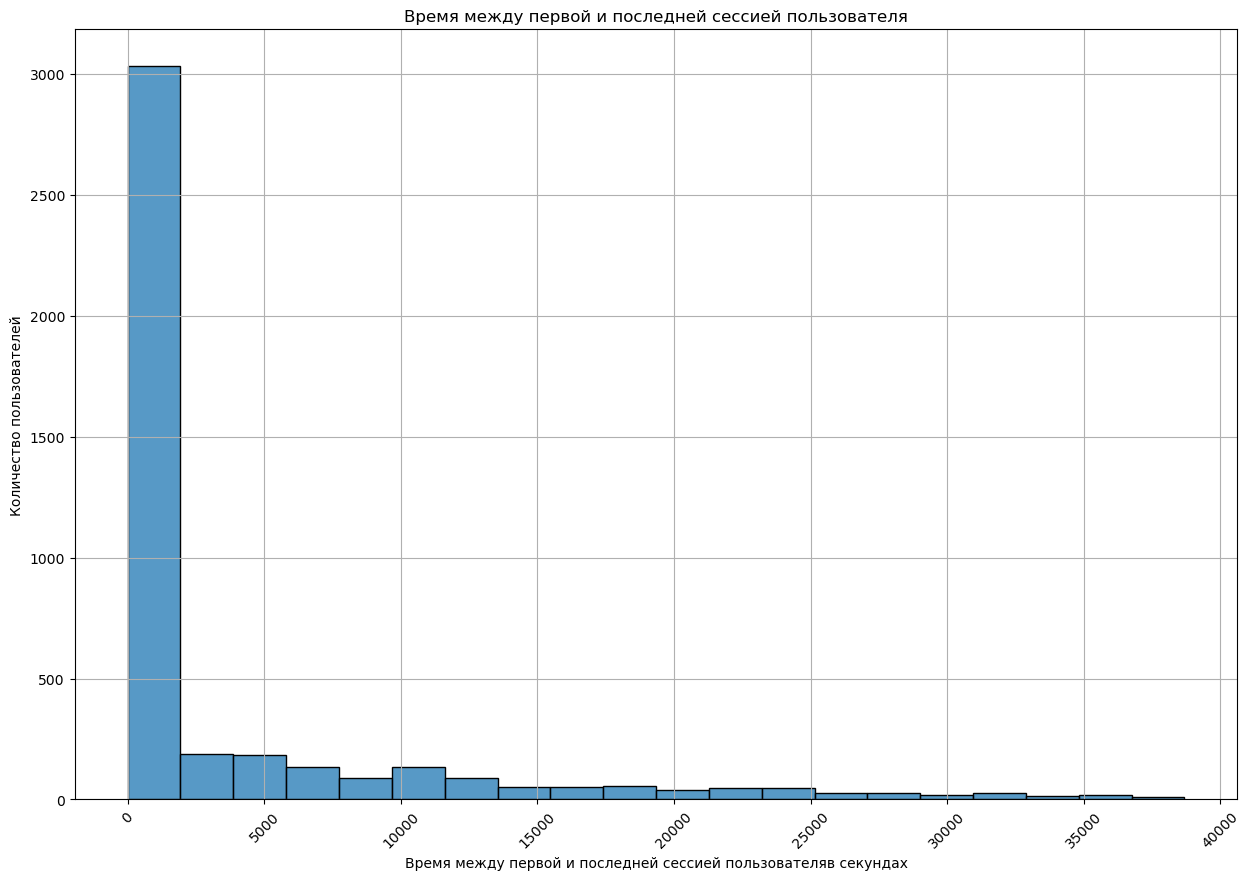

In [29]:
plt.figure(figsize=(15,10))
d = sns.histplot (data = user_by_time['time_delta']/pd.Timedelta(seconds=60),palette="Set3", bins=20)
plt.grid()
d.set_title('Время между первой и последней сессией пользователя')
d.set_xlabel('Время между первой и последней сессией пользователяв секундах')
d.set_ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

* Сессии, являющиеся ошибочными попадают в корзину, которая ближе всего к нулю, а успешные следуют далее, завершается график аномально длинными сессиями пользователей.

In [30]:
sources = data.groupby('source')['user_id'].nunique()
sources

source
google    1129
other     1230
yandex    1934
Name: user_id, dtype: int64

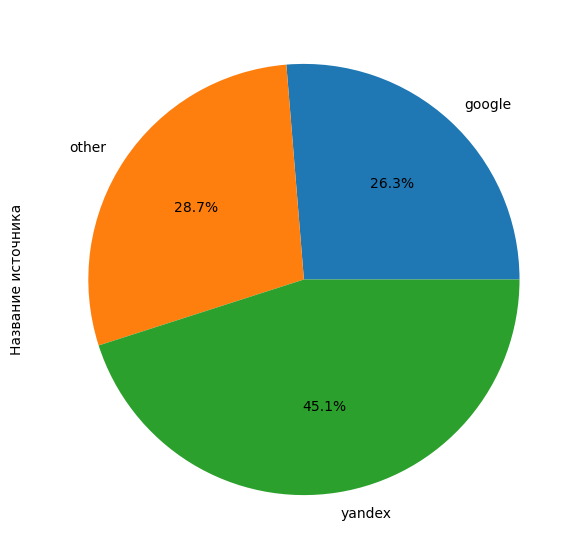

In [31]:
plt.figure(figsize=(7,7))
s = sources.plot.pie(autopct="%.1f%%")
s.set_ylabel('Название источника')
plt.show()

* Среди источников, с которых пользователи переходят к установке приложения лидирует yandex - доля пользователей составляет 45,1%

In [32]:
data['week'] = data['event_time'].dt.isocalendar().week

#### Посчитаем DAU 

In [33]:
dau_total = (
    data.groupby('date').agg({'user_id': 'nunique'}).mean()
)

In [34]:
print(int(dau_total))

279


* DAU позволяет оценить количество людей, которые взаимодействуют с приложением в течение дня, при этом, учитываются уникальные заходы.
* Количество уникальных пользователей в день составляет 279.
* Не рекомендуется рассматривать DAU как единственную метрику.

#### Посчитаем WAU

In [35]:
wau_total = (
    data.groupby(['week'])
    .agg({'user_id': 'nunique'})
    .mean()
)

In [36]:
print(int(wau_total))

1382


* Для расчета WAU берется число уникальных пользователей, которые заходили в приложение в течение недели хотя бы один раз
* Количество уникальных пользователей в месяц составляет 1382

#### Оценим липкий фактор

In [37]:
print(dau_total / wau_total * 100) 

user_id    20.193748
dtype: float64


* Липкий фактор показывает степень заинтересованности клиентов в продукте. Эта метрика демонстрирует, насколько часто клиенты возвращаются в приложение в течении недели или месяца
* Регулярность использования сервиса или приложения для недельной аудитории, составляет в данном случае 20 %.
* В среднем для приложений показатель 20% и выше считается хорошим.

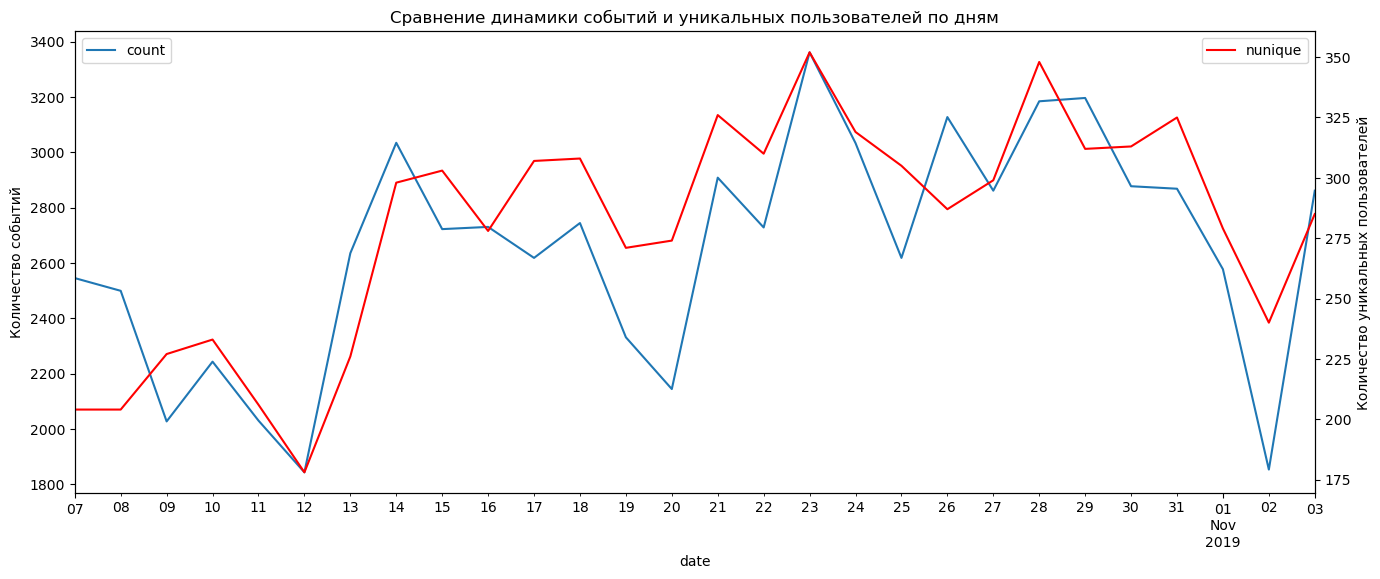

In [38]:
ax = data.groupby('date')['user_id'].agg(['count']).plot(figsize=(16,6))
ax.set(title="Сравнение динамики событий и уникальных пользователей по дням",ylabel="Количество событий")
ax2 = ax.twinx()
data.groupby('date')['user_id'].agg(['nunique']).plot(ax=ax2,color='red')
ax2.set(ylabel="Количество уникальных пользователей")
ax.legend(loc='upper left')
ax2.legend(loc='upper right');

* Сравнение динамики событий и уникальных пользователей по дням указывает на то, что почти за весь период есть согласованность медлу количеством уникальных пользователей и динамикой событий: там, где есть тенденция к росту уникальных пользователей, есть и тенденция к росту динамики уникальных событий и наоборот
* Есть дни, для которых картина выглядит иначе: когда количество уникальных пользователей спадает, а динамика событий возрастает, это может говорить о неоднократной активности в эти дни пользователей, которые не относятся к уникальными за день, а уже заходили в приложение в течение дня

#### Выделим сессии каждого пользователя относительно тайм-аута 20 минут

In [39]:
# определить разницу 20 минут для каждой группы с кумулятивной суммой
g = data.sort_values(by = 'event_time', ascending=True)
g = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('20Min')).cumsum()
# создадим счетчик групп
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1

In [40]:
data = data.sort_values(['user_id', 'event_time'])
display(data.head(20))

event_time event_name  \
2171 2019-10-07 13:39:45.989359  tips_show   
2172 2019-10-07 13:40:31.052909  tips_show   
2173 2019-10-07 13:41:05.722489  tips_show   
2174 2019-10-07 13:43:20.735461  tips_show   
2175 2019-10-07 13:45:30.917502  tips_show   
2176 2019-10-07 13:45:43.212340  tips_show   
2177 2019-10-07 13:46:31.033718  tips_show   
2178 2019-10-07 13:47:32.860234  tips_show   
2179 2019-10-07 13:49:41.716617  tips_show   
2180 2019-10-09 18:33:55.577963        map   
2181 2019-10-09 18:35:28.260975        map   
2182 2019-10-09 18:40:28.738785  tips_show   
2183 2019-10-09 18:42:22.963948  tips_show   
2184 2019-10-21 19:52:30.778932  tips_show   
2185 2019-10-21 19:53:17.165009  tips_show   
2186 2019-10-21 19:53:38.767230        map   
2187 2019-10-21 19:54:45.009859  tips_show   
2188 2019-10-21 19:54:56.854811  tips_show   
2189 2019-10-21 19:56:49.417415        map   
2190 2019-10-21 19:57:21.124551  tips_show   

                                   user_id       date source  \
2171  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2172  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2173  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2174  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2175  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2176  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2177  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2178  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2179  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07  other   
2180  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-09  other   
2181  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-09  other   
2182  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-09  other   
2183  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-09  other   
2184  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2185  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2186  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2187  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2188  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2189  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   
2190  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-21  other   

                  session_start                     ending  \
2171 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2172 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2173 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2174 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2175 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2176 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2177 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2178 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2179 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2180 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2181 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2182 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2183 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2184 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2185 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2186 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2187 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2188 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2189 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
2190 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   

                  time_delta  week  session_id  
2171 14 days 21:51:06.817844    41         273  
2172 14 days 21:51:06.817844    41         273  
2173 14 days 21:51:06.817844    41         273  
2174 14 days 21:51:06.817844    41         273  
2175 14 days 21:51:06.817844    41         273  
2176 14 days 21:51:06.817844    41         273  
2177 14 days 21:51:06.817844    41         273  
2178 14 days 2

In [41]:
event_by_session = data.pivot_table(index = 'event_name', values='session_id', aggfunc='nunique').reset_index().sort_values(by='session_id', ascending=False)
event_by_session

event_name  session_id
8      tips_show        6388
6         search        3031
5    photos_show        2625
4            map        2173
2  contacts_show        1796
0    advert_open        1289
3  favorites_add         513
7     tips_click         421
1  contacts_call         319

Сравнение с результатом распределения уникальных пользователей по событиям, количество переходов в рамках сессий выше, что является логичным, т.к. в случае рассмотрения сессий мы рассматриваем активность одних и тех же людей в течение заданного периода времени. 

#### Оценка количества событий по сессиям 

In [42]:
#plt.figure(figsize=(15,10))
#a = sns.barplot(x = 'event_name', y = 'session_id', data=event_by_session, color = 'blue')
#plt.grid()
#a.set_xlabel('Название события')
#a.set_ylabel('количество событий')
#a.set_title('График количества событий по сессиям')
#plt.show()

#### Оценка количества событий по сессиям по долям

In [43]:
event_by_session['rate'] = (event_by_session['session_id']/data['session_id'].nunique()*100).round(1)

In [44]:
event_by_session

event_name  session_id  rate
8      tips_show        6388  58.2
6         search        3031  27.6
5    photos_show        2625  23.9
4            map        2173  19.8
2  contacts_show        1796  16.4
0    advert_open        1289  11.7
3  favorites_add         513   4.7
7     tips_click         421   3.8
1  contacts_call         319   2.9

In [45]:
#plt.figure(figsize=(15,10))
#c = sns.barplot(y = 'event_name', x='rate', data= event_by_session, palette = 'pastel')
#plt.grid()
#c.set_xlabel('Частота')
#c.set_ylabel('Название события')
#c.set_title('Распределение долей пользователей, совершающих определнные действия в рамках сессий')
#plt.show()

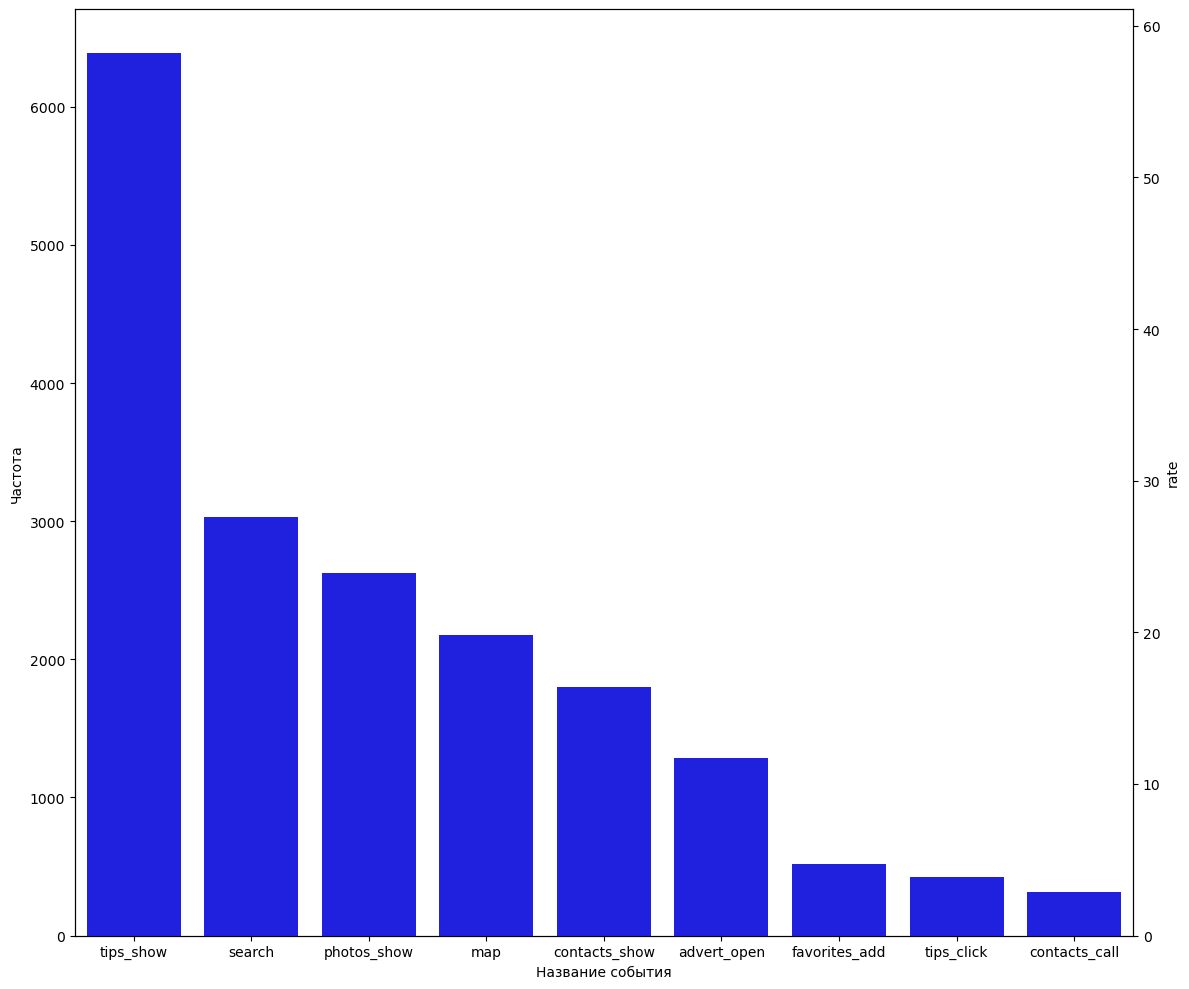

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
c = sns.barplot(x = 'event_name', y = 'session_id', data=event_by_session, color = 'blue', ax=ax)
ax.set_xlabel('Название события')
ax.set_ylabel('Частота')
ax2 = ax.twinx()
d = sns.barplot(x = 'event_name', y ='rate', data= event_by_session, color = 'blue', ax=ax2)
plt.tight_layout()
plt.show()

При анализе количества событий относительно сессий:

* Наибольшее количество переходов на событие tips_show (увидел рекомендованные объявления) 6388 (58.2% пользователей)
* Далее search (поиск) 3031 (27.6%)
* Далее photos_show (показать фото) 2625 (23.9%)
* Затем  событие map (открыл карту объявлений) 2173 (19.8%)
* Далее contacts_show (показать контакты) 1796 (16.4%)

In [47]:
session_info = data.pivot_table(index = ['session_id','event_name'], values='event_time', aggfunc='nunique').reset_index().sort_values(by='session_id', ascending=False)
events_by_session = session_info.pivot(index = 'session_id', columns = 'event_name', values = 'event_time')
events_by_session = events_by_session.fillna(0)

In [48]:
events_by_session = events_by_session.melt()

In [49]:
events_by_session = event_by_session.merge(events_by_session, on='event_name', how='outer').reset_index()

In [50]:
events_by_session

index     event_name  session_id  rate  value
0          0      tips_show        6388  58.2   15.0
1          1      tips_show        6388  58.2   14.0
2          2      tips_show        6388  58.2    3.0
3          3      tips_show        6388  58.2   14.0
4          4      tips_show        6388  58.2   13.0
...      ...            ...         ...   ...    ...
98770  98770  contacts_call         319   2.9    0.0
98771  98771  contacts_call         319   2.9    0.0
98772  98772  contacts_call         319   2.9    0.0
98773  98773  contacts_call         319   2.9    0.0
98774  98774  contacts_call         319   2.9    0.0

[98775 rows x 5 columns]

Рассмотрим диаграммы размаха по сессиям для каждого из событий. 

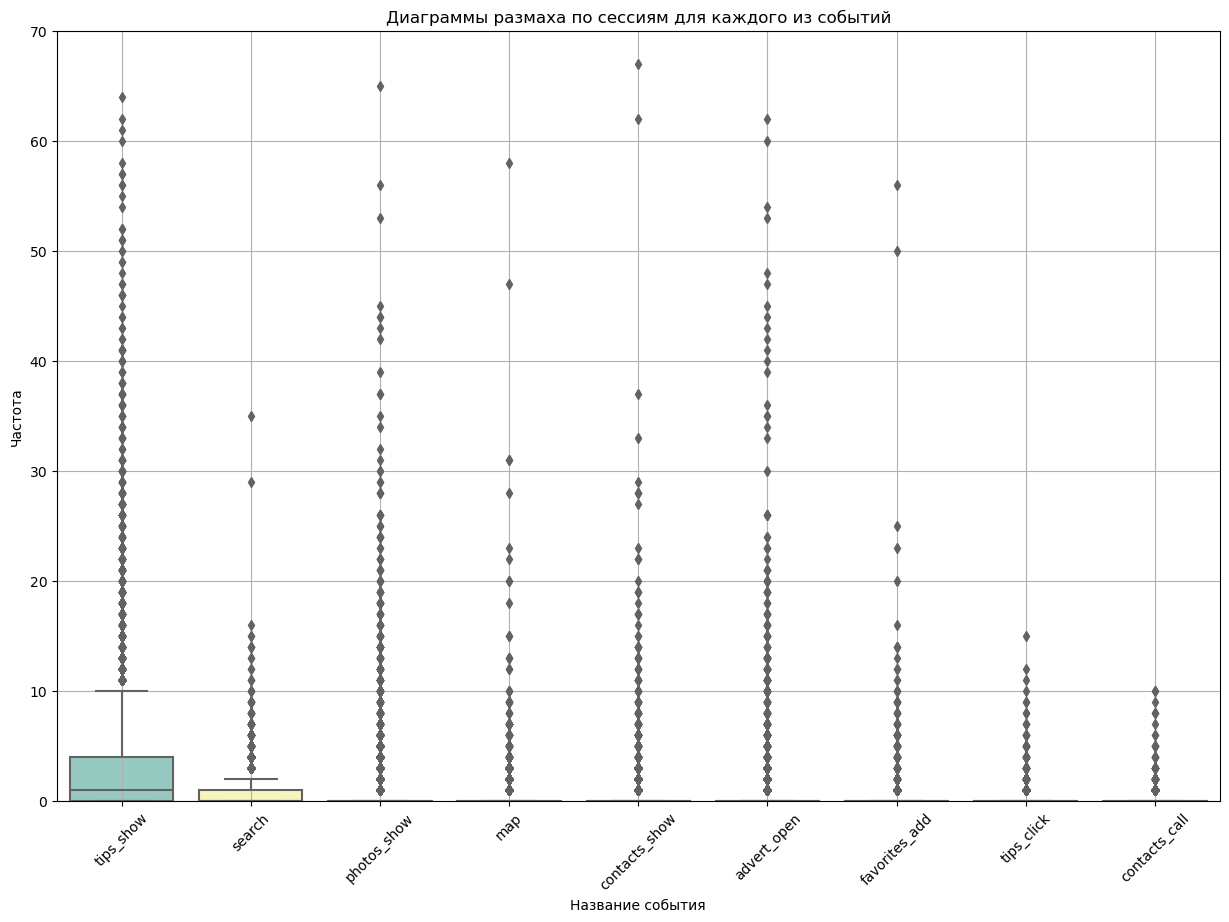

In [51]:
plt.figure(figsize=(15,10))
d = sns.boxplot (x = 'event_name', y = 'value',
             data = events_by_session, 
             width = 0.8, 
             palette="Set3")
plt.grid()
d.set_title('Диаграммы размаха по сессиям для каждого из событий')
d.set_xlabel('Название события')
d.set_ylabel('Частота')
plt.xticks(rotation=45)
plt.ylim(top = 70)
plt.ylim(bottom = 0)
plt.show()

Как видно по графику, не получается выявить наиболее характерные диапазоны значений и избавиться от вылетов, пдробнее рассмотрим данные другими способами.

#### Оценка активности пользователей

In [52]:
data_session = data.pivot_table(index = 'session_id', columns = 'event_name', values = 'event_time', aggfunc=('count')).reset_index()

In [53]:
data_session.head(5)

event_name  session_id  advert_open  contacts_call  contacts_show  \
0                    1         10.0            NaN            NaN   
1                    2         10.0            NaN            NaN   
2                    3          3.0            NaN            NaN   
3                    4          2.0            NaN            NaN   
4                    5          NaN            NaN            NaN   

event_name  favorites_add  map  photos_show  search  tips_click  tips_show  
0                     NaN  3.0          NaN     NaN         NaN       15.0  
1                     NaN  NaN          NaN     NaN         1.0       14.0  
2                     NaN  1.0          NaN     1.0         NaN        3.0  
3                     NaN  NaN          NaN     NaN         NaN       14.0  
4                     NaN  5.0          NaN     3.0         NaN       13.0

In [54]:
display(data_session.describe().T.sort_values(by='count', ascending=False))

count         mean          std  min     25%     50%     75%  \
event_name                                                                      
session_id     10975.0  5488.000000  3168.353936  1.0  2744.5  5488.0  8231.5   
tips_show       6388.0     6.270351     7.742976  1.0     2.0     4.0     8.0   
search          3031.0     2.238205     1.762650  1.0     1.0     2.0     3.0   
photos_show     2625.0     3.814095     5.220857  1.0     1.0     2.0     4.0   
map             2173.0     1.786010     2.496175  1.0     1.0     1.0     2.0   
contacts_show   1796.0     2.521715     3.744943  1.0     1.0     1.0     3.0   
advert_open     1289.0     4.782002     6.459966  1.0     1.0     3.0     5.0   
favorites_add    513.0     2.762183     4.279079  1.0     1.0     1.0     3.0   
tips_click       421.0     1.933492     1.701636  1.0     1.0     1.0     2.0   
contacts_call    319.0     1.695925     1.393499  1.0     1.0     1.0     2.0   

                   max  
event_name              
session_id     10975.0  
tips_show        110.0  
search            35.0  
photos_show       85.0  
map               58.0  
contacts_show     67.0  
advert_open       62.0  
favorites_add     56.0  
tips_click        15.0  
contacts_call     10.0

* Наиболее активно пользователи осуществляют действия: tips_show, search, photos_show
* Наименее активно: favorites_add, tips_click, contacts_call
* Рассмотрим верхний квартиль: наибольшее число переходов на события: tips_show, advert_open, photos_show - те события, с которыми взаимодействует максимальное количество пользователей
* Медианные значения выше у событий: tips_show, advert_open, search, photos_show

In [55]:
event_by_time = data.pivot_table(index = ['session_id','event_name'], values='event_time').sort_values(by=['session_id','event_time']).reset_index()
event_by_time['date'] = event_by_time['event_time'].astype('datetime64[D]')
event_by_time.head(10)

session_id   event_name                    event_time       date
0           1  advert_open 2019-10-07 00:06:41.698586624 2019-10-07
1           1    tips_show 2019-10-07 00:06:58.871754752 2019-10-07
2           1          map 2019-10-07 00:10:46.485264384 2019-10-07
3           2  advert_open 2019-10-07 00:07:57.673310208 2019-10-07
4           2    tips_show 2019-10-07 00:17:29.319962112 2019-10-07
5           2   tips_click 2019-10-07 00:41:18.224553984 2019-10-07
6           3       search 2019-10-08 20:08:10.532069888 2019-10-08
7           3          map 2019-10-08 20:08:18.261622016 2019-10-08
8           3  advert_open 2019-10-08 20:14:05.601377024 2019-10-08
9           3    tips_show 2019-10-08 20:14:27.331326208 2019-10-08

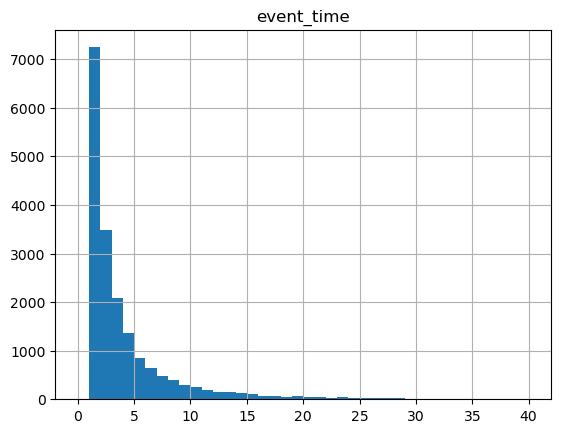

In [56]:
# Количество пар сессия-событие в данных
data.pivot_table(index = ['session_id','event_name'], values='event_time',aggfunc=len).hist(bins=range(41));

#### Оценка порядка, в котором происходят события 

Для каждой сессии составим список событий по порядку:

In [57]:
event_session = []
for session in list(event_by_time['session_id'].unique()):
    event_session.append ([session, list(event_by_time[event_by_time['session_id'] == session]['event_name'].unique())])
    

Создадим датафрейм с набором действий в зависимости от сессии

In [58]:
event_data = pd.DataFrame(event_session, columns=['session_id', 'events'])
event_data.head()

session_id                                 events
0           1          [advert_open, tips_show, map]
1           2   [advert_open, tips_show, tips_click]
2           3  [search, map, advert_open, tips_show]
3           4               [tips_show, advert_open]
4           5               [search, tips_show, map]

Проанализируем наборы действий по количеству повторений

In [59]:
event_data['events'].value_counts().head(20)

[tips_show]                        2924
[photos_show]                      1416
[search]                            819
[map, tips_show]                    626
[search, photos_show]               501
[search, tips_show]                 421
[tips_show, contacts_show]          292
[contacts_show]                     232
[contacts_show, tips_show]          170
[map, advert_open, tips_show]       163
[map]                               154
[advert_open]                       145
[tips_show, map]                    144
[advert_open, tips_show]            143
[photos_show, search]               136
[contacts_show, contacts_call]      122
[search, map, tips_show]            113
[tips_show, tips_click]             111
[map, tips_show, contacts_show]      87
[map, tips_show, advert_open]        74
Name: events, dtype: int64

* Наиболее частыми являются следующие наборы действий:
    * просто открытие рекомендованого объявления tips_show 
    * просмотр фото без каких-либо дальнейших действий photos_show
    * поиск (search) отдельно от каких-либо действий
    * открытие карты и просмотр рекомендуемых объявлений (map, tips_show)
    * поиск и просмотр фото без дальнейших действий (search, photos_show)

Рассмотрим популярные наборы действий, включающих contacts_show

In [60]:
event_data['contacts_show'] = False
event_data['contacts_show'] = event_data['events'].apply(lambda x: ('contacts_show' in x))
display(event_data[event_data['contacts_show']==True].head(10))

session_id                                             events  \
8             9             [contacts_show, tips_show, tips_click]   
25           26                         [tips_show, contacts_show]   
30           31               [photos_show, search, contacts_show]   
69           70                                    [contacts_show]   
70           71                         [contacts_show, tips_show]   
87           88                         [contacts_show, tips_show]   
94           95  [tips_click, tips_show, advert_open, contacts_...   
95           96  [advert_open, tips_show, contacts_show, tips_c...   
97           98                         [tips_show, contacts_show]   
101         102            [contacts_show, advert_open, tips_show]   

     contacts_show  
8             True  
25            True  
30            True  
69            True  
70            True  
87            True  
94            True  
95            True  
97            True  
101           True

In [61]:
event_data[event_data['contacts_show']==True]['events'].value_counts().head(20)

[tips_show, contacts_show]                     292
[contacts_show]                                232
[contacts_show, tips_show]                     170
[contacts_show, contacts_call]                 122
[map, tips_show, contacts_show]                 87
[photos_show, contacts_show]                    68
[contacts_show, photos_show]                    55
[search, contacts_show]                         48
[search, contacts_show, contacts_call]          42
[map, contacts_show, tips_show]                 42
[search, photos_show, contacts_show]            34
[photos_show, contacts_show, contacts_call]     28
[search, tips_show, contacts_show]              26
[contacts_show, contacts_call, photos_show]     20
[search, contacts_show, tips_show]              17
[tips_click, tips_show, contacts_show]          15
[contacts_show, tips_show, tips_click]          15
[contacts_show, search]                         14
[search, contacts_show, photos_show]            14
[contacts_show, map, tips_show]

* Для действий, включающих целевое (contacts_show) характерны следующие наборы действий: 

    * просмотр рекомендованных объявлений - показ контактов (tips_show, contacts_show)
    * показ контактов отдельно от каких-либо действий (contacts_show)
    * показ контактов - показ рекомендованных объявлений (contacts_show, tips_show)
    * показ контактов - звонок по номеру из объявления (contacts_show, contacts_call)
    * карта - показ рекомендованных объявлений - просмотр контактов (map, tips_show, contacts_show)
    * просмотр фото - показ рекомендованных объявлений (photos_show, contacts_show)

* На основе проанализированной информации не удвается выявить строго определенной воронки действий

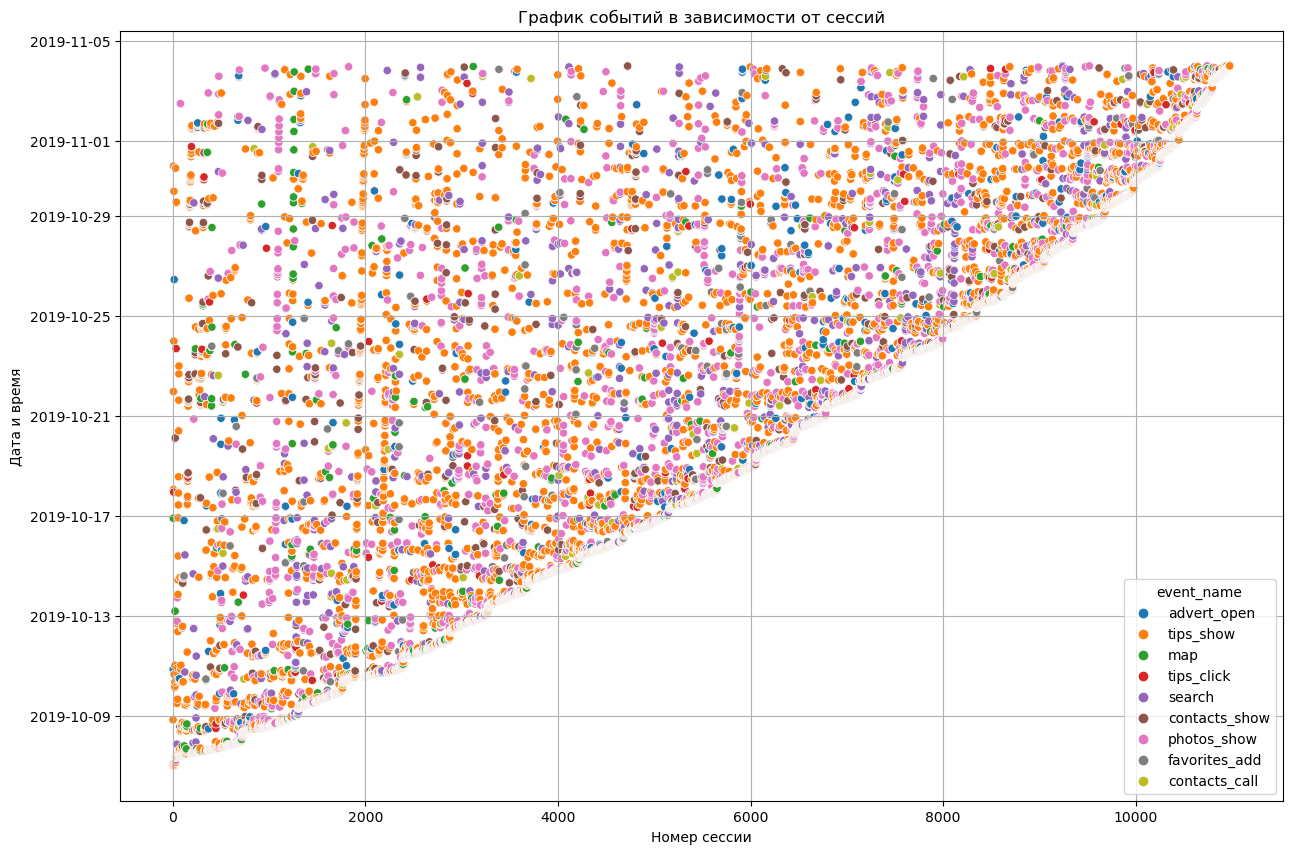

In [62]:
plt.figure(figsize=(15,10))
k = sns.scatterplot (x = 'session_id', y = 'event_time',data=event_by_time, hue = 'event_name')
plt.grid()
k.set_title('График событий в зависимости от сессий')
k.set_xlabel('Номер сессии')
k.set_ylabel('Дата и время')
plt.show()

* Практически каждая сессия включает в себя действие tips_show
* Процент осуществления действия photos_show большой, при этом, относительно общего количества действий дейтствие contacts_show не является распространенным 
* Видно что пользователи могут осуществлять действия tips_show, photos_show, которые далее обрываются

Рассмотрим подробнее порядок действий пользователей для случайной даты, 01.11.2019

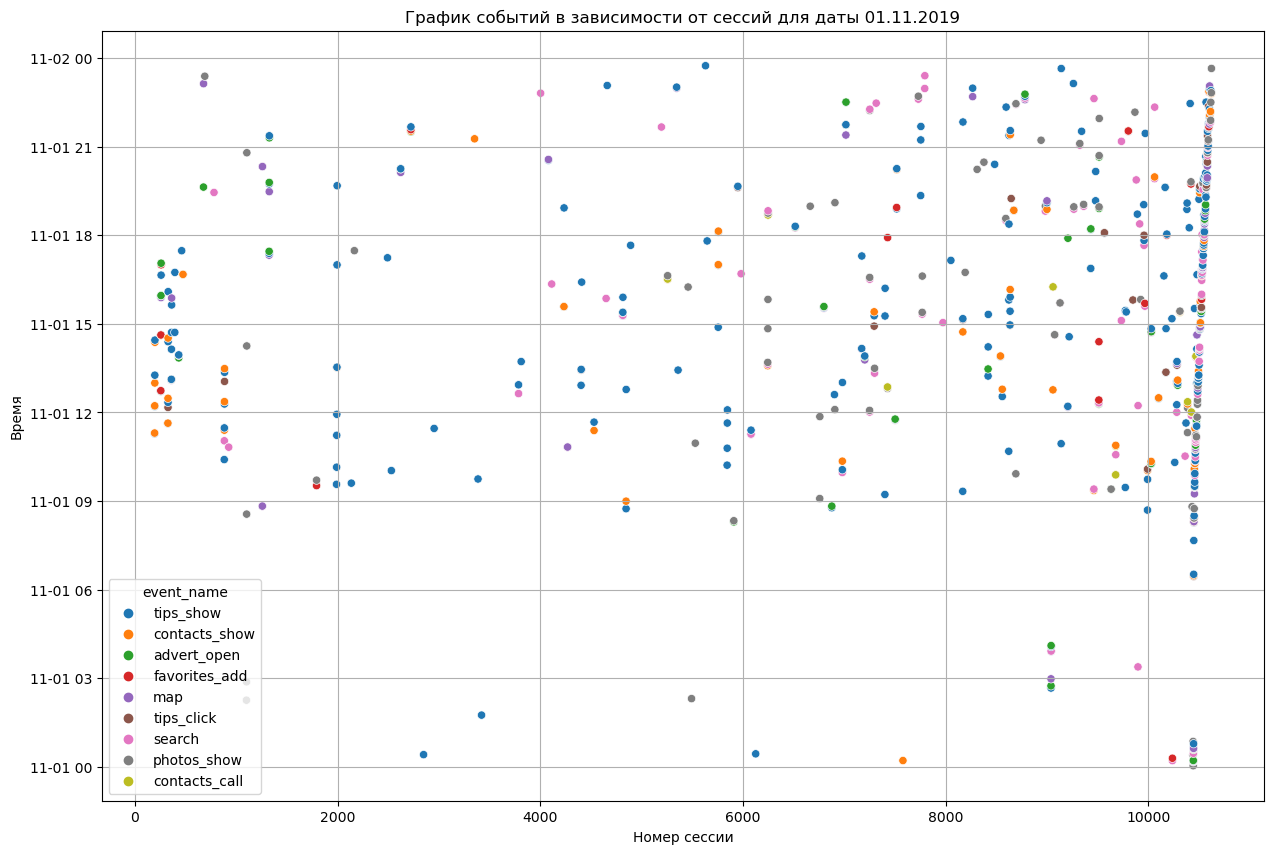

In [63]:
plt.figure(figsize=(15,10))
m = sns.scatterplot (x = 'session_id', y = 'event_time',data=event_by_time.query('date == "2019-11-01"'), hue = 'event_name')
m.set_title('График событий в зависимости от сессий для даты 01.11.2019')
m.set_xlabel('Номер сессии')
m.set_ylabel('Время')
plt.grid()
plt.show()

* Как видно по времени использования, утренние часы до 9 утра не являются активным периодом использования приложения
* Есть сессии, включающие в себя только tips_show
* Есть сессии, включающие search-tips_show-tips_click
* Есть сессии, включающие в себя последовательность действий: tips_click-tips_show-contacts_show

Рассмотрим подробнее действия пользователей, совершивших действия contacts_show

In [64]:
# выборка пользователей, совершающих действие contacts_show

contacts_show = event_by_time.query('event_name =="contacts_show"')['session_id'].unique().tolist()
contacts_show_df = data.query('session_id==@contacts_show')[['session_id', 'event_name', 'event_time','date']]
print('Кол-во пользователей, совершивших действия "contacts_show"', len(contacts_show))


Кол-во пользователей, совершивших действия "contacts_show" 1796


In [65]:
contacts_show_df.head()

session_id     event_name                 event_time       date
42969        6362         search 2019-10-20 18:49:24.115634 2019-10-20
42970        6362    photos_show 2019-10-20 18:59:22.541082 2019-10-20
42971        6362  favorites_add 2019-10-20 19:03:02.030004 2019-10-20
42972        6362         search 2019-10-20 19:04:16.149734 2019-10-20
42973        6362         search 2019-10-20 19:09:56.162564 2019-10-20

In [66]:
contacts_show_df_count = contacts_show_df.pivot_table(index = 'event_name', values='event_time', aggfunc='nunique').sort_values(by='event_time', ascending=False).reset_index()
print(contacts_show_df_count)

      event_name  event_time
0      tips_show        7228
1  contacts_show        4529
2    photos_show        1520
3         search         850
4    advert_open         729
5  contacts_call         541
6            map         499
7  favorites_add         246
8     tips_click         182


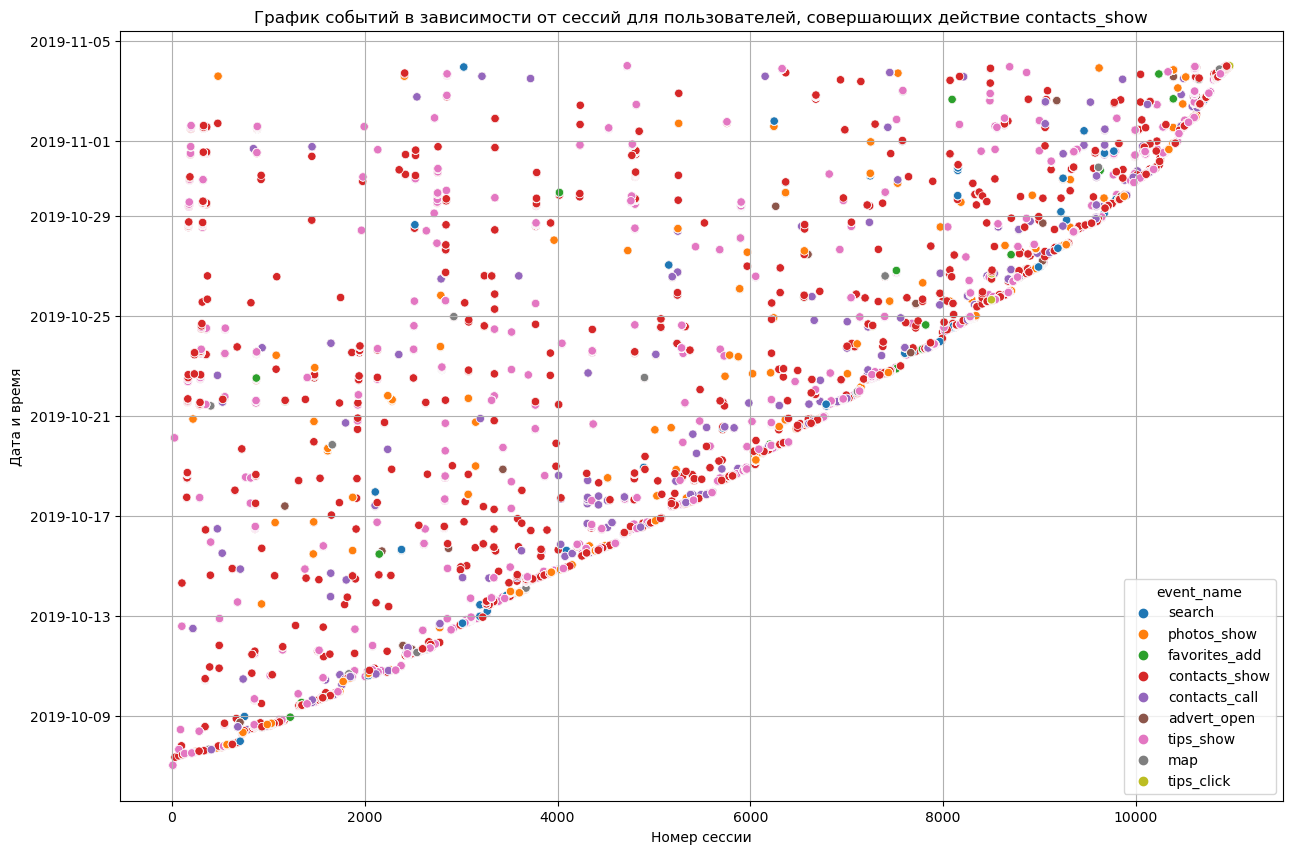

In [67]:
plt.figure(figsize=(15,10))
p = sns.scatterplot (x = 'session_id', y = 'event_time',data=contacts_show_df, hue = 'event_name')
p.set_title('График событий в зависимости от сессий для пользователей, совершающих действие contacts_show')
p.set_xlabel('Номер сессии')
p.set_ylabel('Дата и время')
plt.grid()
plt.show()

* Сессии, включающее действие contacts_show также включают действия tips_show, photos_show, search, contacts_call
* При этом, встречаются следующие последовательности действий: search - photos_show - contacts_show
* Встречаются последовательности: tips_show - photos_show - contacts_show

In [68]:
# выборка пользователей, не совершающих действие contacts_show

contacts_without = event_by_time.query('(event_name == "photos_show")|(event_name == "advert_open")|(event_name == "search")|(event_name == "contacts_call")|(event_name == "tips_show")|(event_name == "tips_click")|(event_name == "favorites_add")')['session_id'].unique().tolist()
contacts_without_df = data.query('session_id==@contacts_without')[['session_id', 'event_name', 'event_time']]
print('Кол-во пользователей, не совершивших действия "contacts_show"', len(contacts_without))


Кол-во пользователей, не совершивших действия "contacts_show" 10576


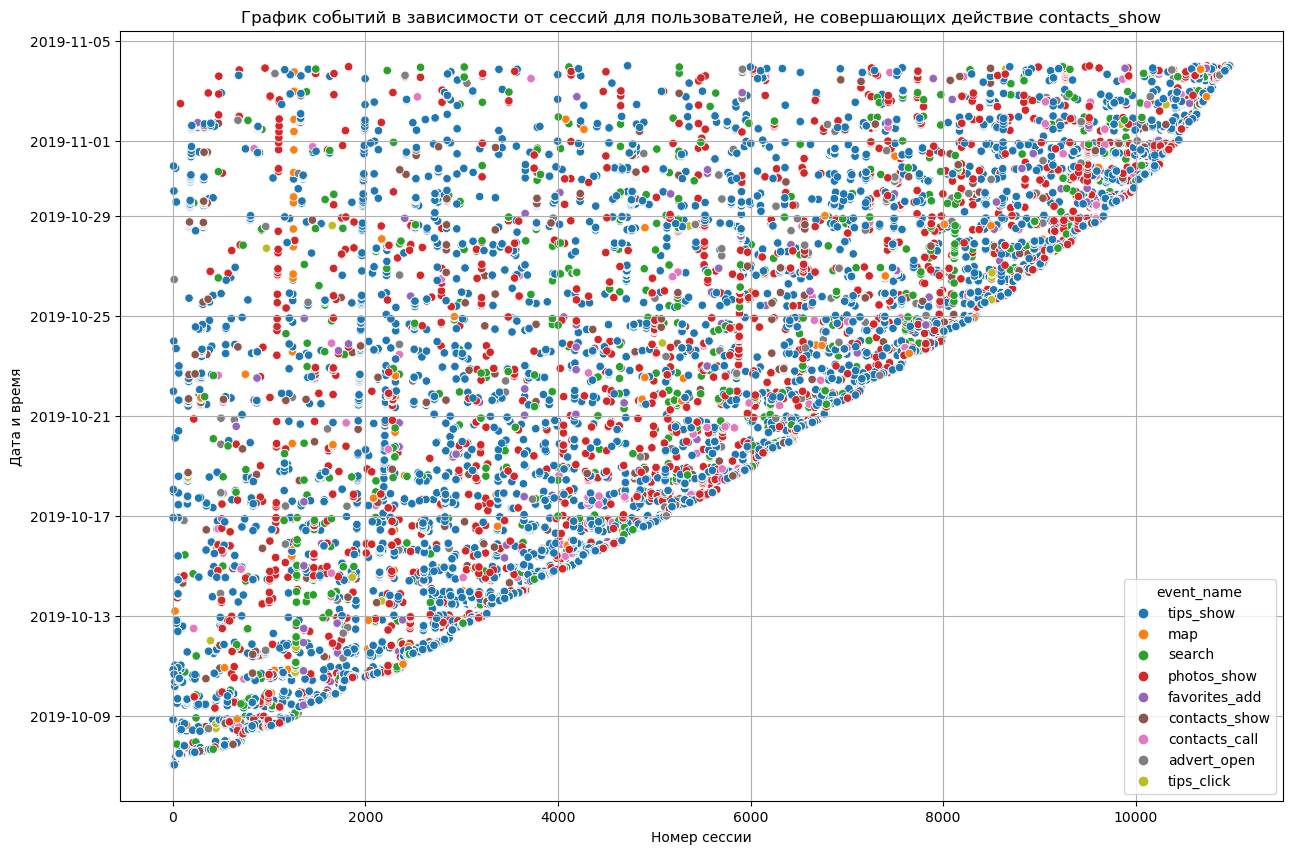

In [69]:
plt.figure(figsize=(15,10))
f = sns.scatterplot (x = 'session_id', y = 'event_time',data=contacts_without_df, hue = 'event_name')
f.set_title('График событий в зависимости от сессий для пользователей, не совершающих действие contacts_show')
f.set_xlabel('Номер сессии')
f.set_ylabel('Дата и время')
plt.grid()
plt.show()

In [70]:
contacts_without_df.head()

session_id event_name                 event_time
2171         273  tips_show 2019-10-07 13:39:45.989359
2172         273  tips_show 2019-10-07 13:40:31.052909
2173         273  tips_show 2019-10-07 13:41:05.722489
2174         273  tips_show 2019-10-07 13:43:20.735461
2175         273  tips_show 2019-10-07 13:45:30.917502

In [71]:
contacts_without_df_count = contacts_without_df.pivot_table(index = 'event_name', values='event_time', aggfunc='nunique').sort_values(by='event_time', ascending=False).reset_index()
print(contacts_without_df_count)

      event_name  event_time
0      tips_show       40055
1    photos_show       10012
2         search        6784
3    advert_open        6164
4  contacts_show        3994
5            map        3605
6  favorites_add        1417
7     tips_click         814
8  contacts_call         541


* Наибольшее количество пользователей, не совершающих действие contacts_show осуществляют действия tips_show, photos_show, search

* При этом, одни и те же действия повторяются для некоторых сессий неодократно, и активность обрывается

Анализ данных о пользователях, совершающих действие contacts_show, позволяет выделить предполагаемые последовательноси действий: 
    
Последовательность 1:

tips_show (увидел рекомендованные объявления) - search (поиск) - photos_show (просмотрел фотографии в объявлении) - map (открыл карту объявлений) - contacts show (просмотрел контакты) 

Также возможен вариант без открытия карты:

Последовательность 2:

tips_show (увидел рекомендованные объявления) - photos_show (просмотрел фотографий в объявлении) - advert_open (открыл карточки объявления) - затем contacts show (посмотрел номер телефона)

Последовательности действий сложно определить однозначно: некоторые пользователи пропускают ряд шагов, которые кажутся логичными в рамках сессии, но, при этом, переходят к просмотру контактов

#### Воронка событий

In [72]:
funnel1 = data.query('(event_name == "tips_show") | (event_name == "photos_show") | (event_name == "search") | (event_name == "contacts_show") | (event_name == "map")')
funnel1 = funnel1.pivot_table(index = 'event_name', values='event_time', aggfunc='nunique').sort_values(by='event_time', ascending=False).reset_index()

In [73]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    x = funnel1 ['event_time'],
    y = funnel1 ['event_name'],
    textinfo = "percent initial"))
fig.show()

#### Рассмотрим, какие события чаще предшествуют целевому событию

In [74]:
 # вспомогательная таблица только с путями к contacts_show
success = event_data.query('contacts_show')[['events']].reset_index(drop=True)

# выделим часть пути до успеха
success['way'] = success.apply(lambda row:row['events'][0:row['events'].index('contacts_show')], axis=1)

# составим список из всех этапов перед показом контактов
steps = pd.DataFrame(success.way.sum(), columns =['events'])
steps['n'] = 1

# сгруппируем по событию
steps.groupby('events')['n'].count().sort_values(ascending = False)

events
tips_show        544
search           288
map              237
photos_show      199
advert_open       79
favorites_add     57
tips_click        44
contacts_call     43
Name: n, dtype: int64

* Чаще всего событию contacts_show предшествует событие tips_show
* Второе по популярности событие, предшествующее contacts_show - поиск (search)
* После просмотра карты также часто происходит событие contacts_show 
* Последним популярным событием, предшествующем событию contacts_show является просмотр фотографий (photos_show)
* Ощутимо меньше на целевое событие влияют: открытие рекламы, добавление объявления в избранное
* Меньше всего на целевое событие влияют клик по рекомендованному объявлению и звонок контакту, указанному в объявлении

In [75]:
event_by_session_new = session_info.pivot_table(index = 'event_name', values='session_id', aggfunc='nunique').reset_index().sort_values(by='session_id', ascending=False)
event_by_session_new

event_name  session_id
8      tips_show        6388
6         search        3031
5    photos_show        2625
4            map        2173
2  contacts_show        1796
0    advert_open        1289
3  favorites_add         513
7     tips_click         421
1  contacts_call         319

In [76]:
event_by_session_new['previous'] = event_by_session_new['session_id'].shift(periods=1)
event_by_session_new['convertion'] = (event_by_session_new['session_id']/event_by_session_new['previous']).round(2) # конверсия в следующий шаг
event_by_session_new


event_name  session_id  previous  convertion
8      tips_show        6388       NaN         NaN
6         search        3031    6388.0        0.47
5    photos_show        2625    3031.0        0.87
4            map        2173    2625.0        0.83
2  contacts_show        1796    2173.0        0.83
0    advert_open        1289    1796.0        0.72
3  favorites_add         513    1289.0        0.40
7     tips_click         421     513.0        0.82
1  contacts_call         319     421.0        0.76

#### Оценим удержание клиентов: Расчет Retention Rate

In [77]:
# создаем датафрейм с сессиями
sessions = data.groupby(['user_id', 'session_id']).agg({'event_time':['first', 'last'], 
                                                   'event_name':'count'}).reset_index()
sessions = sessions.set_axis(['user_id', 'session_n', 'session_start', 'session_end', 'events_count'], axis='columns')
# создаем датафрейм для самого первого события у каждого пользователя
sessions

user_id  session_n  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349        273   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349        274   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349        275   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349        276   
4      00157779-810c-4498-9e05-a1e9e3cedf93       6361   
...                                     ...        ...   
10970  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2850   
10971  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2851   
10972  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2852   
10973  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2853   
10974  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2854   

                   session_start                session_end  events_count  
0     2019-10-07 13:39:45.989359 2019-10-07 13:49:41.716617             9  
1     2019-10-09 18:33:55.577963 2019-10-09 18:42:22.963948             4  
2     2019-10-21 19:52:30.778932 2019-10-21 20:07:30.051028            14  
3     2019-10-22 11:18:14.635436 2019-10-22 11:30:52.807203             8  
4     2019-10-19 21:34:33.849769 2019-10-19 21:59:54.637098             9  
...                          ...                        ...           ...  
10970 2019-11-02 01:16:48.947231 2019-11-02 01:16:48.947231             1  
10971 2019-11-02 18:01:27.094834 2019-11-02 18:17:41.386651             2  
10972 2019-11-02 19:25:53.794029 2019-11-02 19:30:50.471310             4  
10973 2019-11-03 14:32:55.956301 2019-11-03 14:48:44.263356            15  
10974 2019-11-03 15:36:01.007440 2019-11-03 16:08:25.388712            14  

[10975 rows x 5 columns]

In [78]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [79]:
profiles = get_profiles(sessions)

In [80]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [81]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 10, 25).date()

In [82]:
retention_raw, retention = get_retention(
    profiles, sessions, observation_date, 5, ignore_horizon=False
)

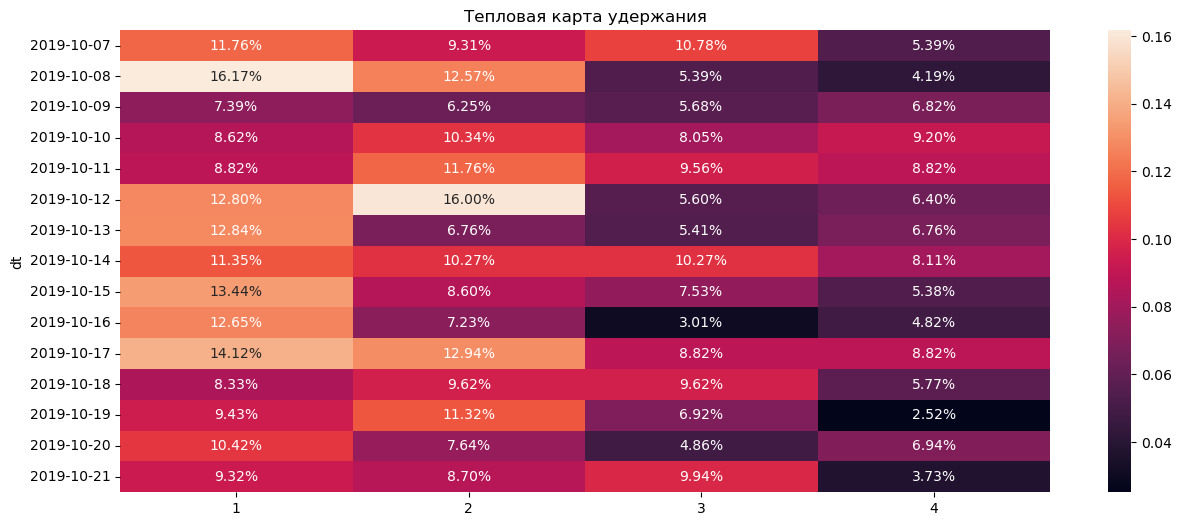

In [83]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

* При рассмотрении временного промежутка 14 дней, заметно как на 8 день в одной из когорт заметно снижается удержание пользователей,
* На 9 день эта тенденция охватывает и остальные когорты, далее происходит поэтапное снижение интереса и выхода на первоначальный уровень интереса, как на первой неделе уже не происходит

#### Проверка статистических гипотез

1. Одни пользователи совершают действия 'tips_show' и 'tips_click', другие — только 'tips_show'.

Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп.


2. Конверсия в просмотры контактов выше у пользователей, просматривающие фото объявления (совершающих действие photos_show).

Проверим гипотезу: На конверсию в просмотры контактов влияет действие photos_show

Проверим гипотезу: конверсия в просмотры контактов различается у пользователей, совершающих действия 'tips_show' и 'tips_click' по сравнению с пользователями, совершающими только действие 'tips_show'.

#### Нулевая гипотеза Но: 
Между пользователями, совершающими действия 'tips_show' и 'tips_click' совместно с целевым "contacts_show" и пользователями, совершающими только действие 'tips_show' совместно с целевым "contacts_show" нет значимой разницы. 

Альтернативная гипотеза H1: между указанными группами значимая разница есть.

In [84]:
# выборка пользователей, совершающих действие tips_show

selection = session_info.query('event_name =="tips_show"')['session_id'].unique().tolist()
show_df = data.query('session_id==@selection')[['session_id', 'event_name', 'event_time']]
show_count = show_df['event_time'].count()

# выборка пользователей, совершающих действие tips_show и tips_click
selection_show = session_info.query('event_name =="tips_click" and session_id==@selection')['session_id'].unique().tolist()
show_click_df = data.query('session_id==@selection_show')[['session_id', 'event_name', 'event_time']]
show_click_count = show_click_df['event_time'].count()

# выборка пользователей, совершающих действия tips_show и tips_click + contacts_show
show_click = show_click_df[show_click_df['event_name']=="contacts_show"]['event_time'].count() 

# выборка пользователе, совершающих действия tips_show + contacts_show
show = show_df[show_df['event_name']=="contacts_show"]['event_time'].count()

Проверим гипотезу о равенстве долей с помощью z-теста

In [85]:
alpha = 0.05

stat, pval = proportions_ztest(np.array([show, show_click]), 
                               np.array([show_count, show_click_count])) 
print(pval)

if (pval < alpha): 
        print("Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.")
else:
        print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет.")

0.4664701621630487
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет.


Т.о. принимаем нулевую гипотезу: Между пользователями, совершающими действия'tips_show' и 'tips_click' совместно с целевым "contacts_show" и пользователями, совершающими только действие 'tips_show' совместно с целевым "contacts_show" нет значимой разницы.

Проверим гипотезу: Конверсия в просмотры контактов выше у пользователей, просматривающие фото объявления (совершающих действие photos_show)

#### Нулевая гипотеза Но:

Между пользователями, совершающими действия 'photos_show' совместно с целевым "contacts_show" и пользователями, не совершающими действие 'photos_show' совместно с целевым "contacts_show" нет значимой разницы.

Альтернативная гипотеза H1: между указанными группами значимая разница есть.

In [86]:
# выборка пользователей, совершающих действие photos_show

selection_show_photo = data.query('event_name =="photos_show"')['session_id'].unique().tolist()
show_photo_df = data.query('session_id==@selection_show_photo')[['session_id', 'event_name', 'event_time']]
show_photo_count = show_photo_df['event_time'].count()

# выборка пользователей, не совершающих действие photos_show

selection_info = session_info['session_id'].unique().tolist()
selection_info_new = data.query('session_id==@selection_info')[['session_id', 'event_name', 'event_time']]
selection_info_count = selection_info_new['event_time'].count()


In [87]:
# выборка пользователей, совершающих действие photos_show + contacts_show

show_photo = show_photo_df[show_photo_df['event_name']=="contacts_show"]['event_time'].count()

# выборка пользователей, совершающих действие contacts_show

no_photo = selection_info_new[selection_info_new['event_name']=="contacts_show"]['event_name'].count()


In [88]:
alpha = 0.05

stat, pval = proportions_ztest(np.array([show_photo, no_photo]), 
                               np.array([show_photo_count, selection_info_count]))
print(pval)

if (pval < alpha): 
        print("Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.")
else:
        print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет.")

1.3276797688786787e-05
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия.


Т.о. между пользователями, совершающими действия 'photos_show' совместно с целевым "contacts_show" и пользователями, не совершающими действие 'photos_show' совместно с целевым "contacts_show" есть значимая разница.

#### Выводы

#### Предобработка данных: 
* Была проведена предобработка и подготовка данных к дальнейшему исследованию
* Исправлены данные столбцов и приведены к подходящему стилю
* Пропуски и дубликаты не обнаружены
* Заменен тип данных столбца с датой и временем
* Добавлен новый столбец с указанием даты
* Объединены столбцы show_contacts и contacts_show

#### Исследовательский анализ данных: 
* Выделили сессии каждого пользователя относительно тайм-аута 20 минут
* Оценили количество переходов и количество пользователей на каждое событие
* Оценили временного периода представленных данных
* Оценка количества событий по сессиям
*При анализе количества событий относительно сессий:
Наибольшее количество переходов на событие tips_show (увидел рекомендованные объявления) 17545
Далее photos_show (просмотрел фотографии в объявлении) 4714
Далее contacts show (посмотрел номер телефона) 2954
Затем событие map (открыл карту объявлений) 2872
Далее advert_open (открыл карточку объявления) 2598

До открытия фотографий в рамках выделенных сессии доходят 16.8% пользователей
Видят рекомендованные объявления 62% пользователей
Просматривают контакты 10.6% пользователей
Просматривают карту 10.3% пользователей

Для дальнейшего анализа исключили вылеты значений по основным событиям.

При рассмотрении графика количество переходов на событие, получается цепочка наиболее распространенных событий: tips_show (увидел рекомендованные объявления) - photos_show (просмотрел фотографий в объявлении) - advert_open (открыл карточки объявления) - затем contacts show (посмотрел номер телефона)

При рассмотрении графика количества пользователей на одно событие, цепочка наиболее популярных: tips_show (увидел рекомендованные объявления) - map (открыл карту объявлений) - photos_show (просмотрел фотографий в объявлении) - contacts show

При рассмотрении количества событий по сессиям (не более 20 минут): tips_show (увидел рекомендованные объявления) - photos_show (просмотрел фотографии в объявлении) - contacts show - map (открыл карту объявлений).

Последовательность на основании рассмотрения количества событий по сессиям согласуется с реальностью, при этом, количество событий contacts show и map сопоставимо, выделим следующую цепочку действий:

#### Предполагаемые последовательности событий
#### Последовательность 1
tips_show (увидел рекомендованные объявления) - photos_show (просмотрел фотографии в объявлении) - map (открыл карту объявлений) - contacts show (просмотрел контакты)
Рассмотрим также последовательность, которая прослеживаетмя при анализе количества переходов на событие:

#### Последовательность 2
tips_show (увидел рекомендованные объявления) - photos_show (просмотрел фотографий в объявлении) - advert_open (открыл карточки объявления) - затем contacts show (посмотрел номер телефона)

#### Проверили гипотезы:

Одни пользователи совершают действия 'tips_show' и 'tips_click', другие — только 'tips_show'.
Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп.

Конверсия в просмотры контактов выше у пользователей, просматривающие фото объявления (совершающих действие photos_show).
Проверим гипотезу: На конверсию в просмотры контактов влияет действие photos_show

Одни пользователи совершают действия 'photos_show' и 'advert_open', другие — только 'photos_show'. 
Проверим гипотезу: конверсия в просмотры контактов различается у пользователей, совершающих действия 'photos_show' и 'advert_open' по сравнению с пользователями, совершающими только действие 'photos_show'.

* Конверсия в целевое действие пользователей, совершивших действия tips_show+click  = 9.7%
* Конверсия в целевое действие пользователей, совершивших действия tips_show  = 6.68%

Т.о. гипотеза о различии конверсии в просмотры контактов у двух групп совершающих действия 'tips_show' и 'tips_click', и совершающих только 'tips_show'подтверждается.

Конверсия в просмотр контактов выше у группы совершивших действия tips_show+click.

Конверсия в целевое действие пользователей, совершивших действия photos_show  = 6.22%
Кол-во пользователей, не совершивших действия photos_show = 10.71%

Т.о. гипотеза о влиянии на конверсию в просмотры контактов действия photos_show не подтвердилась.

Конверсия в целевое действие пользователей, совершивших действия advert_open и show_photo  = 8.33%
Конверсия в целевое действие пользователей, совершивших действия photos_show  = 6.22%

Т.о. гипотеза о различии конверсии в просмотры контактов у двух групп совершающих действия advert_open и photos_show, и совершающих только photos_show подтверждается.
Конверсия в просмотр контактов выше у группы совершивших действия advert_open и photos_show.

### Общие выводы

Анализ поведения пользователей в мобильном приложении производился на основании данных за период с 07.10.2019 - 03.11 2019, распределение данных по указанным датам равномерно, без аномальных пропусков данных.

Доля целевого события (contacts_show) относительно общего количества действий достаточно невысока и составляет 16,4% при рассмотрении 20-минутных сессий пользователей в приложении.

Пользователи, просматривающие контакты, в рамках сессий осуществляют следующие действия tips_show, search, photos_show, map.
Наибольшее количество пользователей, не совершающих действие contacts_show осуществляют действия tips_show, photos_show, search
При этом, одни и те же действия повторяются для некоторых сессий неодократно, и активность обрывается, не достигнув целевого действия. 

Просмотр рекомендованных объявлений является лидирующим событием по числу переходов, чем более точно рекомендация будет соответствовать запросу пользователя, тем больше шанс что пользователь предпримет целевое действие.

Наименее популярными являются действия пользователей: favorites_add, tips_click. Возможно, они недостаточно хорошо реализованы на данный момент в приложении, и неудобны в использовании. Тем не менее, favorites_add требует более пристального внимания, т.к. развитие возможности добавления объявлений в избранные может увеличить конверсию в целевое действие. Также добавление самим пользователем объявлений в избранное, могло бы повтиять на формируемый пул рекомендованных объявлений, они бы точнее отражали запросы самого пользователя.

Высокий процент активностей при просмотре рекомендованных объявлений пользователей, которые далее не переходят к целевому действию, также может говорить, что рекомендации не совсем точно отражают предпочтения пользователя.

Анализ удержания клиентов при рассмотрении временного промежутка 14 дней, показывает что наибольшая активность и интерес сохраняется в течение первой недели, далее заметно спадает - роисходит поэтапное снижение интереса. Чтобы этого не происходило, 
возможно внедрение в функционал приложения оповещений, привлекающих пользователя спустя неделю к возвращению в приложение или предлагающих специальное предложение.

Анализ гипотез показал что нет значимой разницы между пользователями, совершающими действия'tips_show' и 'tips_click' совместно с целевым "contacts_show" и пользователями, совершающими только действие 'tips_show' совместно с целевым "contacts_show".

Между пользователями, совершающими действия 'photos_show' совместно с целевым "contacts_show" и пользователями, не совершающими действие 'photos_show' совместно с целевым "contacts_show" есть значимая разница.